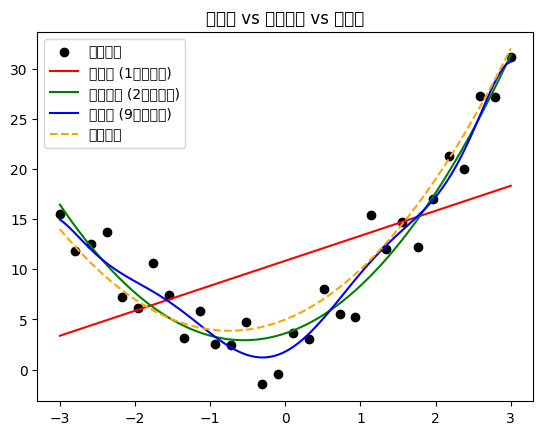

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# True function: y = 2x² + 3x + 5, with some noise
np.random.seed(42)
X = np.linspace(-3, 3, 30)
Y_true = 2 * X**2 + 3 * X + 5
Y = Y_true + np.random.normal(0, 3, size=X.shape)  # add noise

# Function to generate polynomial features
def poly_features(X, degree):
    return np.vstack([X**d for d in range(degree + 1)]).T

# Fit polynomial with least squares
def fit_poly(X, Y, degree):
    X_poly = poly_features(X, degree)
    coef = np.linalg.pinv(X_poly).dot(Y)
    return coef

# Predict using polynomial coefficients
def predict_poly(X, coef):
    degree = len(coef) - 1
    X_poly = poly_features(X, degree)
    return X_poly.dot(coef)

# Fit polynomials with different degrees
coef_underfit = fit_poly(X, Y, degree=1)  # underfit with degree 1 (linear)
coef_goodfit = fit_poly(X, Y, degree=2)   # good fit with degree 2 (quadratic)
coef_overfit = fit_poly(X, Y, degree=9)   # overfit with degree 9 (high degree)

# Plot everything
X_plot = np.linspace(-3, 3, 100)
plt.scatter(X, Y, label='Training data', color='black')

plt.plot(X_plot, predict_poly(X_plot, coef_underfit), label='Underfit (degree 1)', color='red')
plt.plot(X_plot, predict_poly(X_plot, coef_goodfit), label='Good fit (degree 2)', color='green')
plt.plot(X_plot, predict_poly(X_plot, coef_overfit), label='Overfit (degree 9)', color='blue')

plt.plot(X_plot, 2*X_plot**2 + 3*X_plot + 5, label='True function', color='orange', linestyle='--')

plt.legend()
plt.title('Underfit vs Good fit vs Overfit')
plt.show()
